In [76]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

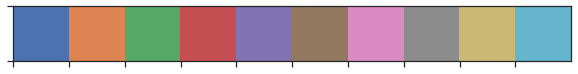

In [74]:
sns.set(font_scale=1.3, style='ticks')
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [43]:
shape_data = os.listdir('data_files/test_age_shape')
shape_data = sorted([ da for da in shape_data if da[-4:]=='.dat' ])
shape_data = shape_data[3:]

In [10]:
def load_age_file(fp):
    data = []
    with open(fp) as fread:
        data = fread.readlines()
    data = [ da for da in data if da[0]!='#' ]
    data = [ da.strip().split(' ') for da in data ]
    data2 = []
    for da in data:
        da2 = [ float(d) for d in da ]
        data2.append(da2)
    #print(data2[0])
    prop, age = zip(*data2)
    return prop, age

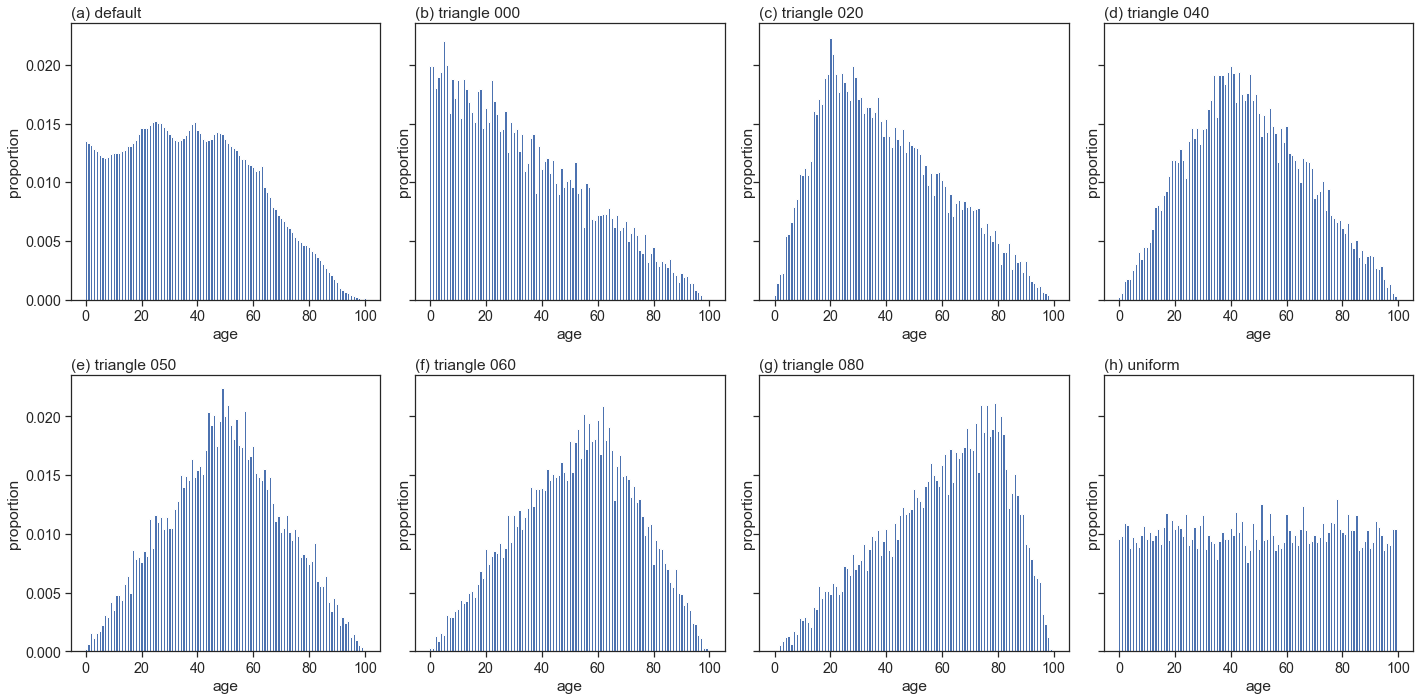

In [57]:
fig, axg = plt.subplots(2, 4, figsize=(20,10), sharey=True)
axs = axg.flatten()

labs = 'abcdefghi'

fp0 = os.path.join('data_files', 'age_dist.dat')
prop, age = load_age_file(fp0)
axs[0].bar(age, prop)
axs[0].set_title('({}) {}'.format(labs[0], 'default'), loc='left')

for i in range(len(shape_data)):
    j = i + 1
    ax = axs[j]
    fname = shape_data[i]
    fp = os.path.join('data_files', 'test_age_shape', fname)
    prop, age = load_age_file(fp)
    ax.bar(age, prop)
    ax.set_title('({}) {}'.format(labs[j], fname[:-4].replace('age_dist_', '').replace('tri', 'triangle').replace('_',' ')), loc='left')
    
for ax in axs:
    ax.set_xlabel('age')
    ax.set_ylabel('proportion')


plt.savefig('test_pop_data_dist.png', dpi=180)
plt.tight_layout()

In [24]:
output_data_dir = sorted(os.listdir('data_files/test_age_shape/output'))[3:]
output_data_dir

['age_dist_tri_000.dat',
 'age_dist_tri_020.dat',
 'age_dist_tri_040.dat',
 'age_dist_tri_050.dat',
 'age_dist_tri_060.dat',
 'age_dist_tri_080.dat',
 'age_dist_uniform.dat']

In [26]:
o0 = output_data_dir[0]

df.head()

,time,age,male,female
ind,,,,
1020,100,0,66,68
1021,100,1,52,43
1022,100,2,39,43
1023,100,3,48,59
1024,100,4,38,45


In [90]:
def make_one_pyramid(fp, ax):
    df = pd.read_csv(fp, index_col=0)
    temp = df[df['time']==0]

    a = temp['age']
    m = temp['male']
    f = temp['female']
    a3, m2, f2 = [], {}, {}
    for i,j,k in zip(a,m,f):
        ag = int(np.floor(i/5))*5
        if i%5==0: 
            a3.append(ag)
            m2[ag] = 0
            f2[ag] = 0
        m2[ag]+=j
        f2[ag]+=k
    m3 = [ m2[ag] for ag in a3 ]
    f3 = [ f2[ag] for ag in a3 ]
    
    ax.barh(a3,[ -k for k in m3 ], height=4.5, align='center', color='#448ee4')
    ax.barh(a3,[ k for k in f3 ], height=4.5, align='center', color='#fdb0c0')
    ax.set_xlim([-500,500])
    ax.set_xticks([ i*100 for i in range(-5,6) ])
    #ax.set_xticks([ i*100-600 for i in range(7) ])
    #ax.set_xticklabels([ abs(i*100-300) for i in range(7) ])
    ax.set_ylabel('age')
    ax.set_xlabel('population')
    ax.text(-200, 100, 'Male', ha='left', va='center')
    ax.text(200, 100, 'Female', ha='right', va='center')

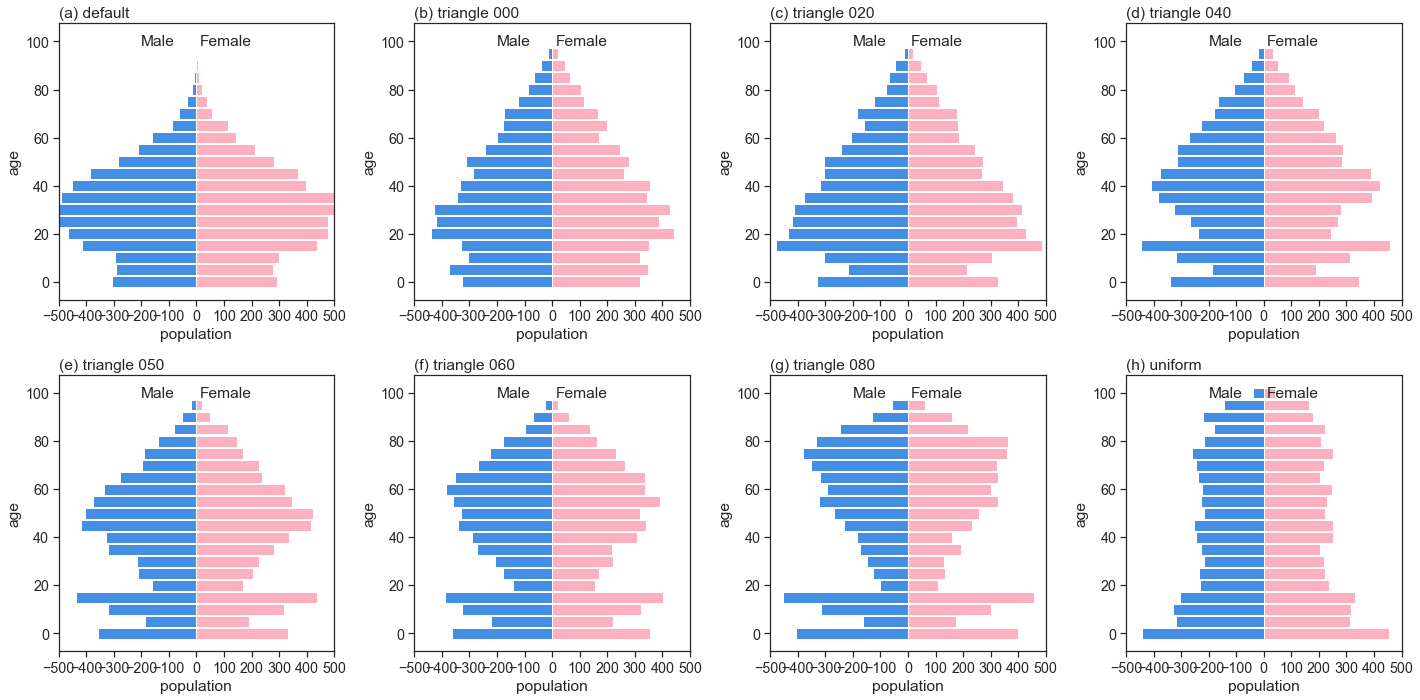

In [91]:

fig, axg = plt.subplots(2, 4, figsize=(20,10))
axs = axg.flatten()

labs = 'abcdefghi'

fp = os.path.join('output', 'stored_sex_age_stats.csv')
ax = axs[0]
make_one_pyramid(fp, ax)
ax.set_title('({}) {}'.format(labs[0], 'default'), loc='left')

for i in range(len(output_data_dir)):
    j = i + 1
    oo = output_data_dir[i]
    fp = os.path.join('data_files/test_age_shape/output', oo, 'stored_sex_age_stats.csv')
    ax = axs[j]
    make_one_pyramid(fp, ax)
    ax.set_title('({}) {}'.format(labs[j], oo[:-4].replace('age_dist_', '').replace('tri', 'triangle').replace('_',' ')), loc='left')

plt.savefig('test_pop_pyramid_initial.png', dpi=70)
plt.tight_layout()

In [92]:
def make_one_pyramid(fp, ax):
    df = pd.read_csv(fp, index_col=0)
    temp = df[df['time']==100]

    a = temp['age']
    m = temp['male']
    f = temp['female']
    a3, m2, f2 = [], {}, {}
    for i,j,k in zip(a,m,f):
        ag = int(np.floor(i/5))*5
        if i%5==0: 
            a3.append(ag)
            m2[ag] = 0
            f2[ag] = 0
        m2[ag]+=j
        f2[ag]+=k
    m3 = [ m2[ag] for ag in a3 ]
    f3 = [ f2[ag] for ag in a3 ]
    
    ax.barh(a3,[ -k for k in m3 ], height=4.5, align='center', color='#448ee4')
    ax.barh(a3,[ k for k in f3 ], height=4.5, align='center', color='#fdb0c0')
    ax.set_xlim([-500,500])
    ax.set_xticks([ i*100 for i in range(-5,6) ])
    #ax.set_xticks([ i*100-600 for i in range(7) ])
    #ax.set_xticklabels([ abs(i*100-300) for i in range(7) ])
    ax.set_ylabel('age')
    ax.set_xlabel('population')
    ax.text(-200, 100, 'Male', ha='left', va='center')
    ax.text(200, 100, 'Female', ha='right', va='center')

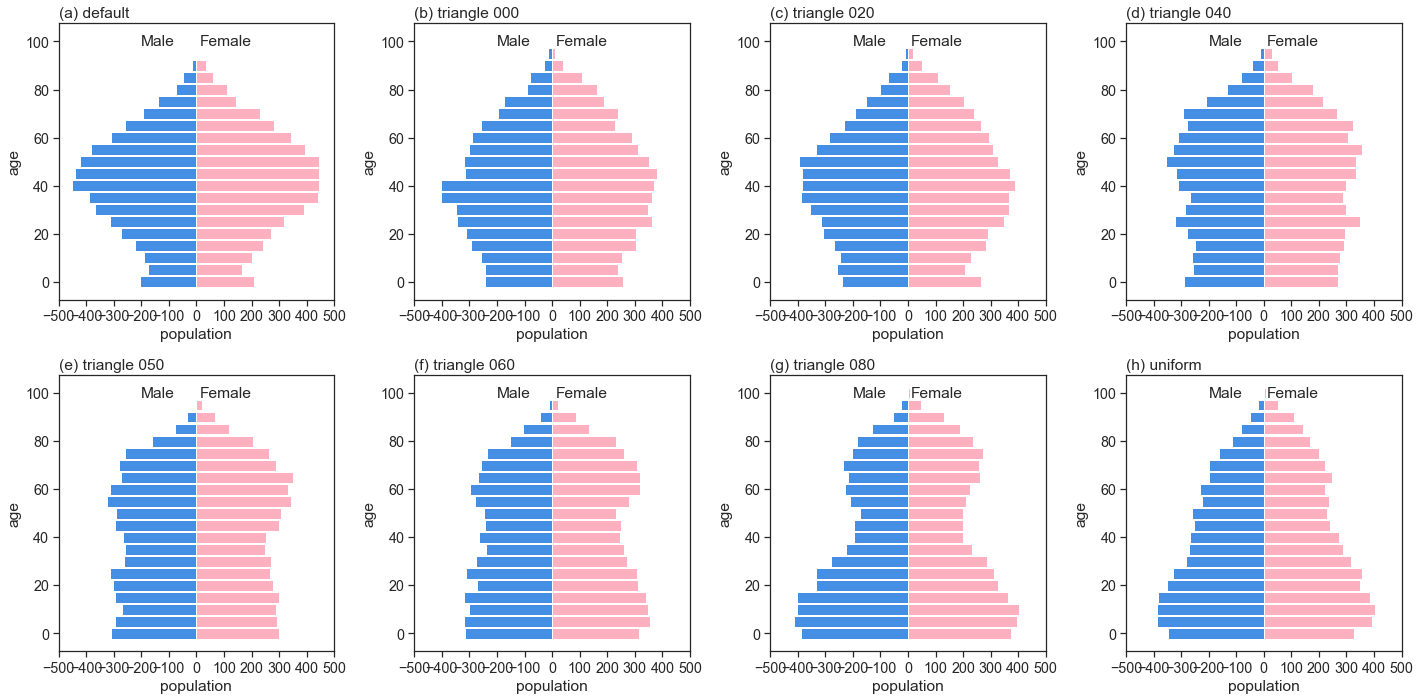

In [93]:

fig, axg = plt.subplots(2, 4, figsize=(20,10))
axs = axg.flatten()

labs = 'abcdefghi'

fp = os.path.join('output', 'stored_sex_age_stats.csv')
ax = axs[0]
make_one_pyramid(fp, ax)
ax.set_title('({}) {}'.format(labs[0], 'default'), loc='left')

for i in range(len(output_data_dir)):
    j = i + 1
    oo = output_data_dir[i]
    fp = os.path.join('data_files/test_age_shape/output', oo, 'stored_sex_age_stats.csv')
    ax = axs[j]
    make_one_pyramid(fp, ax)
    ax.set_title('({}) {}'.format(labs[j], oo[:-4].replace('age_dist_', '').replace('tri', 'triangle').replace('_',' ')), loc='left')

plt.savefig('test_pop_pyramid_after_burn_period.png', dpi=70)
plt.tight_layout()

In [94]:
def make_one_pyramid(fp, ax):
    df = pd.read_csv(fp, index_col=0)
    temp = df[df['time']==200]

    a = temp['age']
    m = temp['male']
    f = temp['female']
    a3, m2, f2 = [], {}, {}
    for i,j,k in zip(a,m,f):
        ag = int(np.floor(i/5))*5
        if i%5==0: 
            a3.append(ag)
            m2[ag] = 0
            f2[ag] = 0
        m2[ag]+=j
        f2[ag]+=k
    m3 = [ m2[ag] for ag in a3 ]
    f3 = [ f2[ag] for ag in a3 ]
    
    ax.barh(a3,[ -k for k in m3 ], height=4.5, align='center', color='#448ee4')
    ax.barh(a3,[ k for k in f3 ], height=4.5, align='center', color='#fdb0c0')
    ax.set_xlim([-500,500])
    ax.set_xticks([ i*100 for i in range(-5,6) ])
    #ax.set_xticks([ i*100-600 for i in range(7) ])
    #ax.set_xticklabels([ abs(i*100-300) for i in range(7) ])
    ax.set_ylabel('age')
    ax.set_xlabel('population')
    ax.text(-200, 100, 'Male', ha='left', va='center')
    ax.text(200, 100, 'Female', ha='right', va='center')

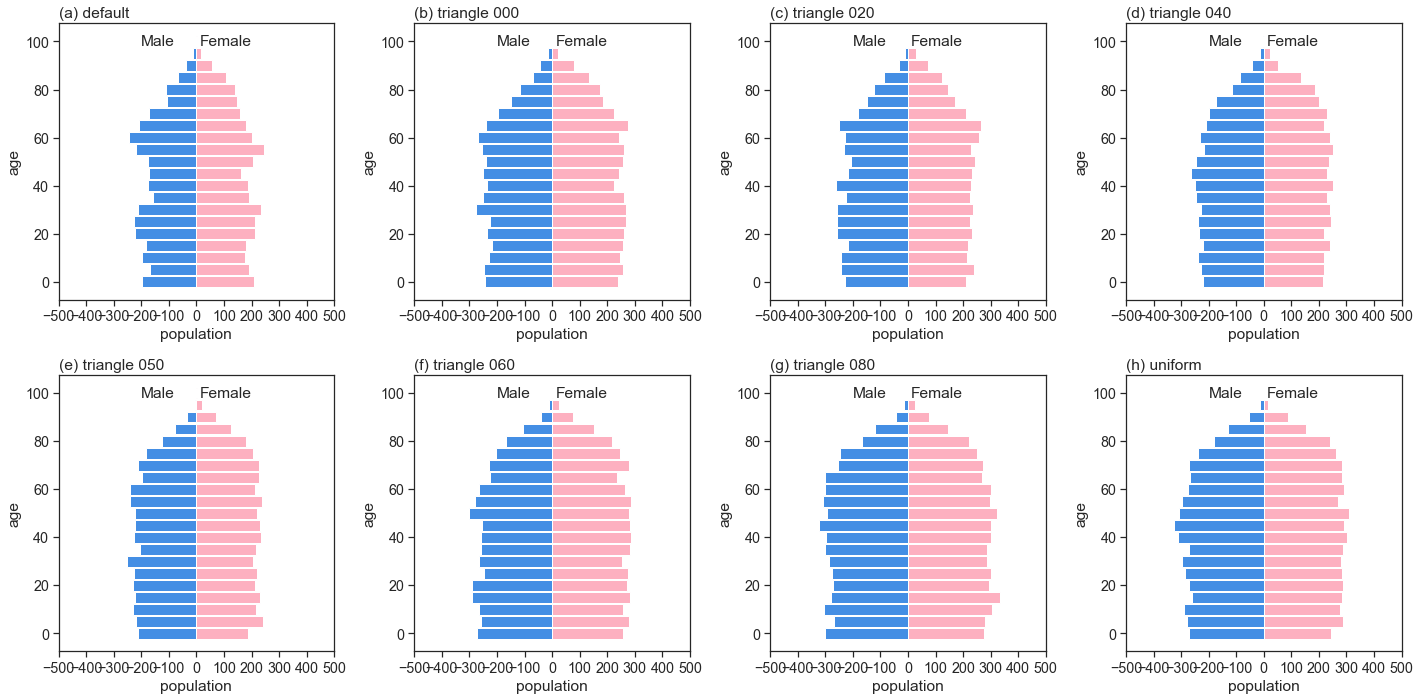

In [95]:

fig, axg = plt.subplots(2, 4, figsize=(20,10))
axs = axg.flatten()

labs = 'abcdefghi'

fp = os.path.join('output', 'stored_sex_age_stats.csv')
ax = axs[0]
make_one_pyramid(fp, ax)
ax.set_title('({}) {}'.format(labs[0], 'default'), loc='left')

for i in range(len(output_data_dir)):
    j = i + 1
    oo = output_data_dir[i]
    fp = os.path.join('data_files/test_age_shape/output', oo, 'stored_sex_age_stats.csv')
    ax = axs[j]
    make_one_pyramid(fp, ax)
    ax.set_title('({}) {}'.format(labs[j], oo[:-4].replace('age_dist_', '').replace('tri', 'triangle').replace('_',' ')), loc='left')

plt.savefig('test_pop_pyramid_year200.png', dpi=70)
plt.tight_layout()

In [66]:
output_data_dir = sorted(os.listdir('data_files/test_age_shape/output'))[3:]
output_data_dir

['age_dist_tri_000.dat',
 'age_dist_tri_020.dat',
 'age_dist_tri_040.dat',
 'age_dist_tri_050.dat',
 'age_dist_tri_060.dat',
 'age_dist_tri_080.dat',
 'age_dist_uniform.dat']

In [70]:

oo = output_data_dir[0]
fp = os.path.join('data_files/test_age_shape/output', oo, 'stored_household.csv')
df_full = pd.read_csv(fp, index_col=0)
#df = df[df['time']==200]
df_full['children'] = df_full['infant'] + df_full['school_age']
df_full.head()

,time,household_id,member,household_founded,infant,school_age,adult,retired,household_size,children
ind,,,,,,,,,,
0,0,0,0;1;2;3,0,0,1,3,0,4,1
1,0,1,4;5;6;7,0,0,2,1,1,4,2
2,0,2,8;9;10;11;12;13,0,0,3,1,2,6,3
3,0,3,14;15,0,0,0,2,0,2,0
4,0,4,16;17;18,0,1,0,1,1,3,1


In [71]:
age_groups = ['children', 'adult', 'retired']

df = df_full[df_full['time']==200]

household_type_counts = { ty:0 for ty in range(8) }

for i in range(len(df)):
    row = df.iloc[i]
    #print(row)
    c = row['children']
    a = row['adult']
    r = row['retired']
    if r==0 and a==0 and c>0: # only children household, not exist by rules 
        household_type_counts[0]+=1
    elif r>0 and a==0 and c==0:
        household_type_counts[1]+=1
    elif r==0 and a>0 and c==0:
        household_type_counts[2]+=1
    elif r>0 and a>0 and c==0:
        household_type_counts[3]+=1
    elif r>0 and a==0 and c>0:
        household_type_counts[4]+=1
    elif r==0 and a>0 and c>0:
        household_type_counts[5]+=1
    elif r>0 and a>0 and c>0:
        household_type_counts[6]+=1
    else:
        # all == 0, a no-people household, not possible to be exist, just for safely capture the else statement
        household_type_counts[7]+=1
household_type_counts

{0: 0, 1: 1330, 2: 1324, 3: 130, 4: 0, 5: 966, 6: 25, 7: 0}

In [72]:
household_type_size_counts = { ty:{k:0 for k in range(1,10)} for ty in range(8) }

for i in range(len(df)):
    row = df.iloc[i]
    #print(row)
    c = row['children']
    a = row['adult']
    r = row['retired']
    if r==0 and a==0 and c>0: # only children household, not exist by rules 
        htype = household_type_size_counts[0]
    elif r>0 and a==0 and c==0:
        htype = household_type_size_counts[1]
    elif r==0 and a>0 and c==0:
        htype = household_type_size_counts[2]
    elif r>0 and a>0 and c==0:
        htype = household_type_size_counts[3]
    elif r>0 and a==0 and c>0:
        htype = household_type_size_counts[4]
    elif r==0 and a>0 and c>0:
        htype = household_type_size_counts[5]
    elif r>0 and a>0 and c>0:
        htype = household_type_size_counts[6]
    else:
        # all == 0, a no-people household, not possible to be exist, just for safely capture the else statement
        htype = household_type_counts[7]
    hsize = row['household_size']
    if not(hsize in htype): htype[hsize] = 0
    htype[hsize]+=1
household_type_size_counts

{0: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 1: {1: 841, 2: 488, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 2: {1: 450, 2: 666, 3: 158, 4: 38, 5: 12, 6: 0, 7: 0, 8: 0, 9: 0},
 3: {1: 0, 2: 79, 3: 47, 4: 4, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 4: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 5: {1: 0, 2: 74, 3: 376, 4: 293, 5: 150, 6: 53, 7: 16, 8: 4, 9: 0},
 6: {1: 0, 2: 0, 3: 2, 4: 9, 5: 8, 6: 2, 7: 2, 8: 2, 9: 0},
 7: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}}

In [101]:
def prep_data(fp):
    #oo = output_data_dir[0]
    df_full = pd.read_csv(fp, index_col=0)
    #df = df[df['time']==200]
    df_full['children'] = df_full['infant'] + df_full['school_age']
    #df_full.head()
    age_groups = ['children', 'adult', 'retired']

    df = df_full[df_full['time']==100]

    household_type_counts = { ty:0 for ty in range(8) }

    for i in range(len(df)):
        row = df.iloc[i]
        #print(row)
        c = row['children']
        a = row['adult']
        r = row['retired']
        if r==0 and a==0 and c>0: # only children household, not exist by rules 
            household_type_counts[0]+=1
        elif r>0 and a==0 and c==0:
            household_type_counts[1]+=1
        elif r==0 and a>0 and c==0:
            household_type_counts[2]+=1
        elif r>0 and a>0 and c==0:
            household_type_counts[3]+=1
        elif r>0 and a==0 and c>0:
            household_type_counts[4]+=1
        elif r==0 and a>0 and c>0:
            household_type_counts[5]+=1
        elif r>0 and a>0 and c>0:
            household_type_counts[6]+=1
        else:
            # all == 0, a no-people household, not possible to be exist, just for safely capture the else statement
            household_type_counts[7]+=1


    household_type_size_counts = { ty:{k:0 for k in range(1,10)} for ty in range(8) }

    for i in range(len(df)):
        row = df.iloc[i]
        #print(row)
        c = row['children']
        a = row['adult']
        r = row['retired']
        if r==0 and a==0 and c>0: # only children household, not exist by rules 
            htype = household_type_size_counts[0]
        elif r>0 and a==0 and c==0:
            htype = household_type_size_counts[1]
        elif r==0 and a>0 and c==0:
            htype = household_type_size_counts[2]
        elif r>0 and a>0 and c==0:
            htype = household_type_size_counts[3]
        elif r>0 and a==0 and c>0:
            htype = household_type_size_counts[4]
        elif r==0 and a>0 and c>0:
            htype = household_type_size_counts[5]
        elif r>0 and a>0 and c>0:
            htype = household_type_size_counts[6]
        else:
            # all == 0, a no-people household, not possible to be exist, just for safely capture the else statement
            htype = household_type_counts[7]
        hsize = row['household_size']
        if not(hsize in htype): htype[hsize] = 0
        htype[hsize]+=1
    return household_type_size_counts

def make_fig(fp, ax):
    
    household_type_size_counts = prep_data(fp)
    prev_cum = [0 for i in range(1,10)]
    for ht in range(1,7):
        hs = household_type_size_counts[ht]
        x = list(range(1,10))
        y = [ hs[k] for k in range(1,10) ]
        y2 = [ a+b for a,b in zip(prev_cum, y) ]
        ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
        prev_cum = y2
        #print(x,y)
        #break

    for a,b in zip(list(range(1,10)), prev_cum):
        xx = a
        yy = b+30
        ax.text(xx, yy, b, ha='center', va='center')

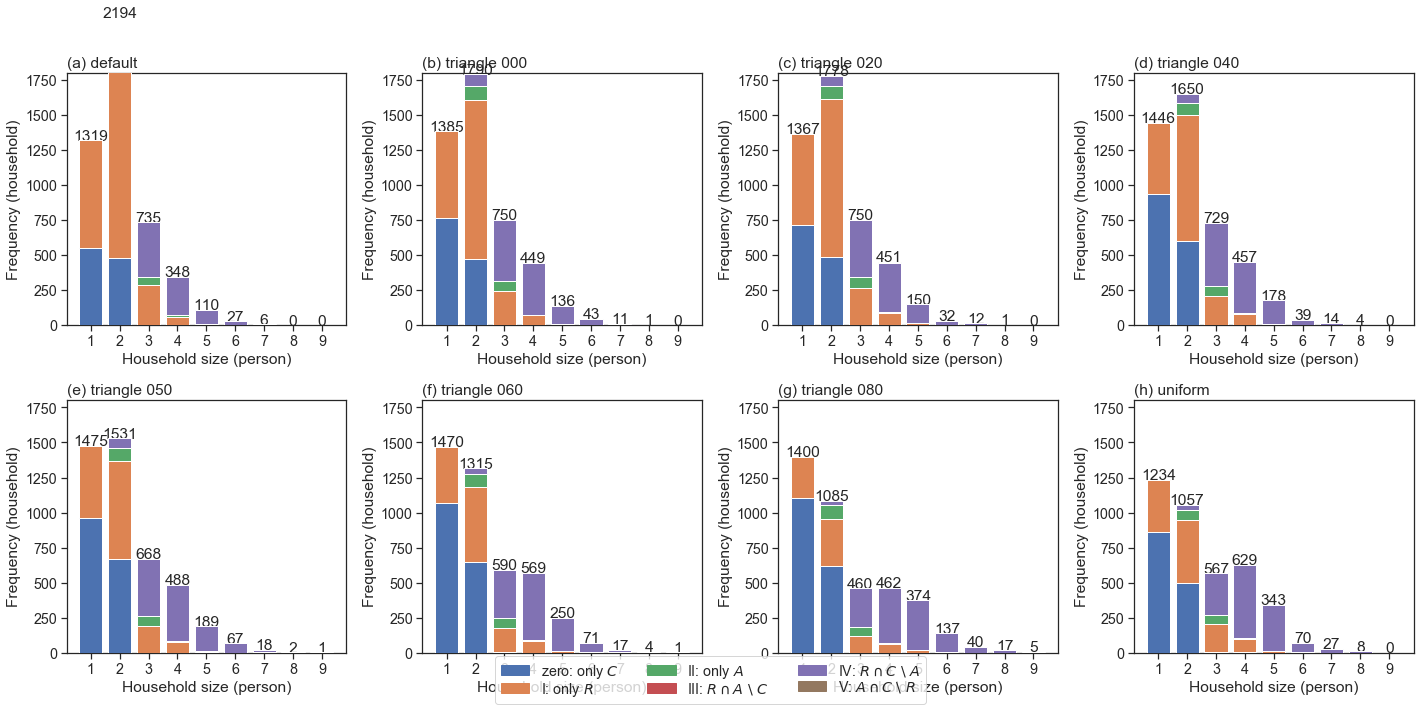

In [102]:
fig, axg = plt.subplots(2, 4, figsize=(20, 10))
axs = axg.flatten()

labs = 'abcdefgh'
ax = axs[0]
fp = os.path.join('output', 'stored_household.csv')
make_fig(fp, ax)
ax.set_title('({}) {}'.format(labs[0], 'default'), loc='left')

for i in range(len(output_data_dir)):
    j = i + 1
    ax = axs[j]
    oo = output_data_dir[i]
    fp = os.path.join('data_files/test_age_shape/output', oo, 'stored_household.csv')
    make_fig(fp, ax)
    ax.set_title('({}) {}'.format(labs[j], oo[:-4].replace('age_dist_', '').replace('tri', 'triangle').replace('_',' ')), loc='left')
    
for ax in axs:
    ax.set_ylim([0,1800])
    ax.set_xlabel('Household size (person)')
    ax.set_ylabel('Frequency (household)')
    ax.set_xticks(list(range(1,10)))

cols = []
legendlabs = ['zero: only $C$', 
        'I: only $R$', 
        'II: only $A$', 
        r'III: $R \cap A \ \backslash \ C$', 
        r'IV: $R \cap C \ \backslash \ A$', 
        r'V: $A \cap C \ \backslash \ R$', 
        r'VI: $R \cap A \cap C$']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(legendlabs[i]))
    cols.append(patch)
#ax.legend(handles=cols, title='Household type')
plt.figlegend( cols, legendlabs, loc = 'lower center', ncol=3, labelspacing=0. )

plt.tight_layout()
plt.savefig('test_pop_household_structure.png',dpi=72, bbox_inches='tight')